# Handling “Missing Data”

[original article](https://habr.com/ru/company/otus/blog/681410/)

На даний момент `Python` є найпопулярнішою мовою програмування, яка застосовується для аналізу даних або в машинному навчанні. Сильними сторонами `Python` є його модульність та можливість інтегруватися з іншими мовами програмування.

У науці даних розвідувальний аналіз даних (exploratory data analysis, EDA) є найважливішим етапом у проекті і займає близько 70-80% часу всього проекту. Такий аналіз дозволяє вивчити якісь властивості даних, знайти в них закономірності, аномалії, очистити їх, підготувати та побудувати початкові моделі для подальшої роботи. На цьому етапі можна визначити вид розподілу, оцінити його основні параметри, виявити викиди, побудувати матрицю кореляції ознак і т.д.

І в попередньому аналізі досить серйозною проблемою є виявлення відсутніх (пропущених) значень і найскладнішим є те, що тут немає якогось універсального алгоритму. Для кожної конкретної задачі доводиться шукати найбільш підходящі методи чи їх комбінації.

Оскільки більшість моделей машинного навчання що неспроможні обробляти пропущені значення, отже їх не можна ігнорувати даних і цю проблему необхідно вирішувати під час передобробки. Найпростішим рішенням є видалення кожного спостереження, що містить одне чи кілька пропущених значень. Це завдання швидко та легко виконується за допомогою бібліотек `Numpy` чи `pandas`.

Разом з цим необхідно намагатися утримуватись від видалення спостережень з відсутніми значеннями. Їх видалення є крайнім засобом, оскільки тоді алгоритм втрачає доступом до корисної інформації, що міститься у непропущених значеннях спостережень.

Можна виділити такі основні стратегії заміни пропущених даних підстановними значеннями.

1. Замінити пропущені значення середнім/медіаною. В даному випадку необхідно обчислити середнє/медіану наявних значень для кожного стовпця і вставити те, що вийшло у пропущені комірки. Даний метод є простим та швидким, але не працює з якісними змінними. Також неможливо оцінити похибку імпутації.

2. Заміна найчастішим значенням чи константою. Також є ще одним простим методом імпутації. Можна використовувати для якісних змінних

3. Заміна даних за допомогою методу k найближчих сусідів або kNN. Є найпопулярнішим методом машинного навчання на вирішення завдань класифікації. Заснований на оцінюванні подібності об'єктів. Використовується функція відстані Евкліда

${\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+\ldots +(p_{n}-q_{n})^{2}}}={\sqrt {\sum _{i=1}^{n}(p_{i}-q_{i})^{2}}}$

4. Множинна імпутація даних (MICE). Суть цього методу у тому, що імпутація кожного значення проводиться неодноразово, а багато. Такий тип заміни пропущених значень дозволяє зрозуміти наскільки надійно чи ненадійно запропоноване значення. Також, MICE, дозволяє працювати зі змінним різних типів.

5. Імпутація даних за допомогою глибоко навчання. Бібліотека `datawig` дозволяє відновлювати значення, що відсутні, за рахунок тренування нейронної мережі на тих точках, для яких є всі параметри.

In [1]:

import pandas as pd

import numpy as np

data_diabetes = pd.read_csv('https://raw.githubusercontent.com/pruhlo/Dealing_with_missing_data/master/assets/diabetes.csv')
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Даний набір містить такі поля: Pregnancies (кількість вагітностей), Glucose (рівень глюкози), BloodPressure (тиск), SkinThickness (товщина шкірної складки трицепса в мм), Insulin (рівень інсуліну), BMI (індекс маси тіла), DiabetesPedigree діабету у родичів), Age (вік), Outcome (наявність діабету).

Подивимося на основні характеристики кожної ознаки.

In [2]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Можно увидеть, почти в каждом столбце есть нулевые значения. Посчитаем их количество 

In [3]:
(data_diabetes ==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Можна припустити, що це пропущені значення, де невідоме значення замінили нулем. Перетворимо всі нулі у значеннях 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' на значення `NaN` і ще раз порахуємо їх кількість, попередньо зробивши копію нашого датасету.

In [4]:
new_data = data_diabetes.copy(deep = True)

colsFix = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

new_data [colsFix] = new_data[colsFix].replace(0, np.NaN)

new_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

І ще раз подивимося на характеристики датасету

In [5]:
new_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Майже у кожному стовпці, крім max, відбулися якісь зміни.

Яким чином можна проводити імпутацію даних? Працюватимемо тільки зі стовпцями SkinThickness та Insulin, оскільки вони мають найбільше пропущених значень.

# 1. У бібліотеці Pandas (яка була вже завантажена раніше) є метод fillna(), який дозволяє заповнити пропущені значення.

Синтаксис методу наступний

```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
```

Важливо, що метод повертає об'єкт, у якому заповнюються все пропущені значення. Можна замінити пропущені значення, наприклад, середнім, медіаною, найчастіше зустрічається значенням, константою.

Обчисли ці значення, а потім замінимо пропущені значення медіаною використовуючи метод fillna.

Параметр SkinThickness

In [6]:
median_Skin = new_data.SkinThickness.median() # Out: 29.0
mean_Skin= new_data.SkinThickness.mean() # Out: 29.153419593345657
mode_Skin = new_data.SkinThickness.mode() # Out: 32.0
median_Insulin = new_data.Insulin.median() # Out: 125.0
mean_Insulin = new_data.Insulin.mean() # Out: 155.5482233502538
mode_Insulin = new_data.Insulin.mode() # Out: 105.0

Скористаємося методом `fillna()` для відновлення значень

In [7]:
new_data = new_data.fillna({'SkinThickness' : median_Skin})

new_data = new_data.fillna({'Insulin' : median_Insulin})

In [8]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


У даному випадку при використанні методу fillna вказується стовпець і значення, які необхідно заповнити.

Якщо необхідно заповнити значення в кількох шпальтах відразу, тоді можна зробити, наприклад, так

In [9]:
new_data = new_data.fillna({'Insulin':median_Insulin, 'SkinThickness':median_Skin})

# 2. Бібліотека Sklearn має клас SimpleImputer, який використовується для відновлення пропущених значень.

Використовується наступний синтаксис

```python
SimpleImputer(missingValues, strategy, fill_value)
```
`missingValues` – тут можна встановити різні кодування пропущених значень, наприклад, такі як `np.nan` чи `pd.NA`.

`strategy`: це дані, які замінять відсутні значення з набору даних, за умовчанням метод значення цього параметра – середнє. Також можна використовувати такі стратегії: середня, медіана, що найчастіше зустрічається, константа.

`fill_value` – константне значення, яке замінить пропущені значення

Для заміни пропущених значень використовують метод `fit_transform`.

Докладніше про клас `SimpleImputer` можна подивитися тут.

Продемонструємо роботу з цим класом

In [10]:
#!pip install -U scikit-learn

In [11]:
from sklearn.impute import SimpleImputer  # імпортуємо бібліотеку

myImputer = SimpleImputer(strategy= 'mean') # визначаємо імпутер для обробки відсутніх значень, використовується стратегія заміни середнім значенням

myImputer = SimpleImputer(strategy= 'median') # використовується стратегія заміни медіанним значенням

myImputer = SimpleImputer(strategy= 'most_frequent') # використовується стратегія заміни найбільш часто зустрічається значенням

# використовуємо метод fit_transform для заміни пропущених значень

new_data.Insulin = myImputer.fit_transform(new_data['Insulin'].values.reshape(-1,1))

Якщо необхідно замінити категоріальні пропущені значення, можна використовувати стратегію «найчастіше значення» чи «константа». **Тільки одне зауваження**: всі категоріальні ознаки мають бути переведені до числових.

```
ValueError: 'fill_value'=1 is invalid. Expected a numerical value when imputing numerical data
```

In [12]:
new_data.Outcome = new_data.Outcome.astype(int)

In [13]:
myImputer = SimpleImputer(strategy= 'constant', fill_value=1)

new_data.Outcome = myImputer.fit_transform(new_data['Outcome'].values.reshape(-1,1))

Для заміни значень у кількох стовпцях у датасеті середнім/медіаною/конcтантою можна використовувати наступну команду

In [14]:
new_data[['Insulin','SkinThickness']]=myImputer.fit_transform(new_data[['Insulin','SkinThickness']])

# 3. Клас IterativeImputer бібліотеки sklearn реалізує 

багатовимірні алгоритми відновлення пропущених значень, оцінюючи інші значення набору. Даний клас моделює кожну ознаку пропущеного значення як функцію від інших ознак та використовує оцінку для заміни значень. `IterativeImputer` фактично ітеративно будує модель регресії, використовуючи підмножини стовпців для прогнозування відсутніх значень.

  Докладніше про клас `IterativeImputer` можна подивитися [тут](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).

Подивимося на роботу з цим класом

In [15]:
X = new_data.copy(deep = True) # створюємо копію датасету
# імпортуємо бібліотеку

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

# визначаємо імпутер

myImputer=IterativeImputer()

# встановлюємо imputer на X

myImputer.fit(X) 

# отримуємо відновлені дані

myImputer_data = myImputer.transform(X)

# отримані дані перетворюємо на DataFrame

myImputer_data = pd.DataFrame(myImputer_data,columns = new_data.columns)

In [16]:
myImputer_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


# 4. Клас KNNImputer бібліотеки sklearn

забезпечує відновлення пропущених значень з допомогою методу k – найближчих сусідів.

Докладніше про клас [тут](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html).

In [17]:
# імпортуємо бібліотеку

from sklearn.impute import KNNImputer

# визначаємо імпутер

imputer=KNNImputer(n_neighbors=5, weights='uniform')

# встановлюємо імпутер на Х

imputer.fit(X)

# відновлюємо дані

X1 = imputer.transform(X)

# отримані дані перетворюємо на DataFrame

myImputer_data = pd.DataFrame(X1, columns = new_data.columns)

Кожен відсутній об'єкт розраховується з використанням значень від `n_neighbors` найближчих сусідів, які мають значення для даного об'єкта. Характеристики сусідів усереднюються рівномірно або зважуються на відстані кожного сусіда

Для визначення параметра `n_neighbors` немає певного способу, можна визначити лише експериментальним шляхом. Низьке значення параметра може призвести до ефекту недонавчання моделі, а надто висока впливає на продуктивність. Найчастіше найкращим є значення, що дорівнює 5.

Подивимося на порівняльну таблицю методів `SimpleImputer`, `IterativeImputer`, `KNNImputer`

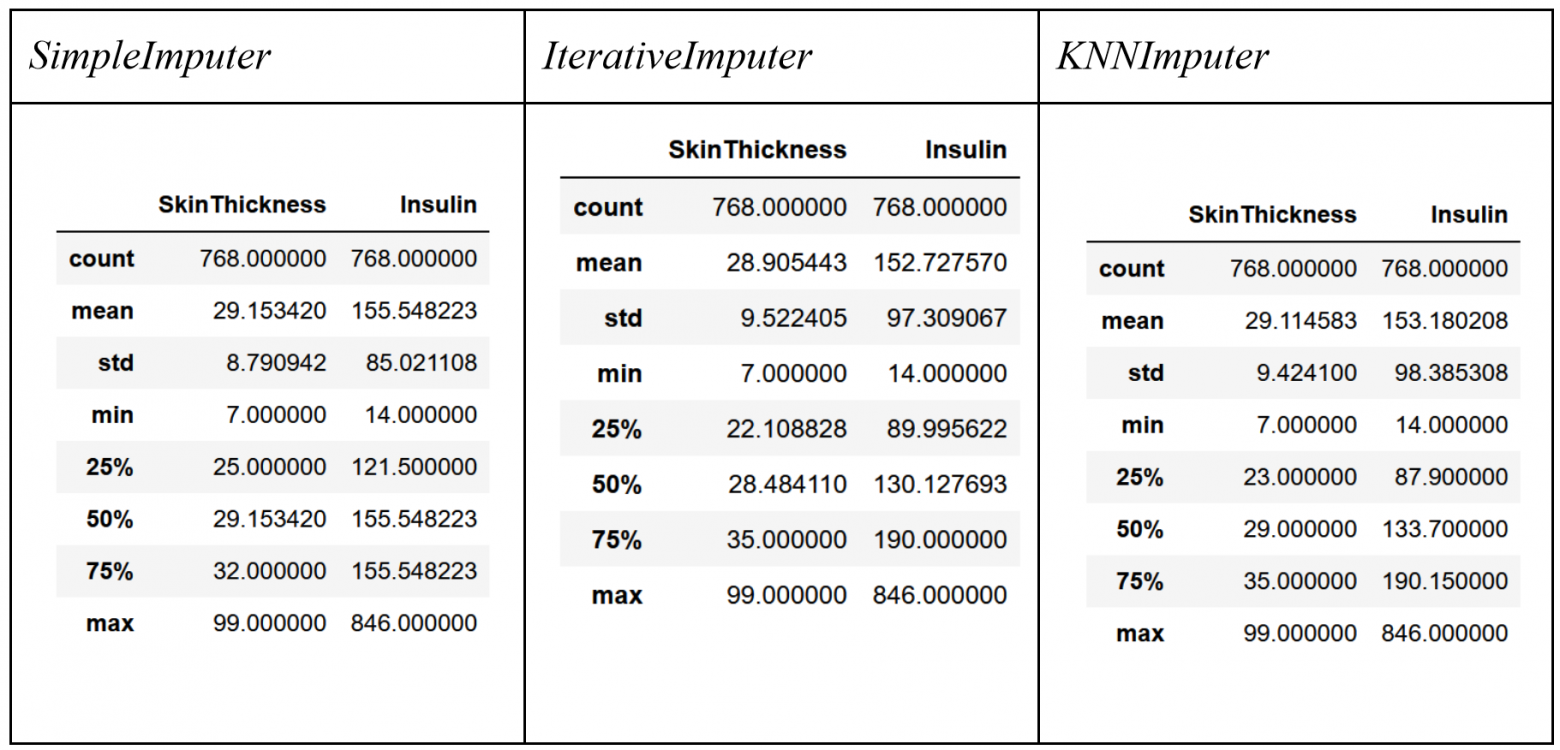